In [1]:
# =========================================================
# EDA for Kaggle Playground Series S3E24 (Smoker Status)
# =========================================================
# Quick, opinionated EDA: schema checks, missingness, imbalance,
# distribution and correlation scans, collinearity, outliers,
# train-vs-test drift, and a lightweight leakage probe.
#
# Run this top-to-bottom in a Kaggle notebook (or locally after
# changing DATA_DIR). Produces plots and summary tables.
# =========================================================

%pip install --upgrade numpy scipy pandas scikit-learn

import os, sys, math, warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import mutual_info_classif
from sklearn.metrics import roc_auc_score
from sklearn.linear_model import LogisticRegression
from scipy.stats import ks_2samp, chi2_contingency, iqr

warnings.filterwarnings("ignore")
plt.rcParams["figure.figsize"] = (8, 5)
sns.set(style="whitegrid")

# -----------------------------
# 0) Paths & reading
# -----------------------------
KAGGLE_DIR = "/kaggle/input/playground-series-s3e24"
LOCAL_DIR = "./data"  # change if running locally
DATA_DIR = KAGGLE_DIR if os.path.exists(KAGGLE_DIR) else LOCAL_DIR

train_path = os.path.join(DATA_DIR, "train.csv")
test_path  = os.path.join(DATA_DIR, "test.csv")

train = pd.read_csv(train_path)
test  = pd.read_csv(test_path)

print(f"train shape: {train.shape} | test shape: {test.shape}")
train.head()


   ---------------------------------------- 0.0/12.9 MB ? eta -:--:--
   --------- ------------------------------ 3.1/12.9 MB 15.4 MB/s eta 0:00:01
   ----------------------- ---------------- 7.6/12.9 MB 18.8 MB/s eta 0:00:01
   ---------------------------------- ----- 11.3/12.9 MB 19.0 MB/s eta 0:00:01
   ---------------------------------------- 12.9/12.9 MB 17.6 MB/s eta 0:00:00
   ---------------------------------------- 0.0/41.3 MB ? eta -:--:--
   ---- ----------------------------------- 5.0/41.3 MB 25.2 MB/s eta 0:00:02
   ---------- ----------------------------- 11.3/41.3 MB 28.2 MB/s eta 0:00:02
   --------------- ------------------------ 15.7/41.3 MB 26.0 MB/s eta 0:00:01
   ------------------- -------------------- 20.2/41.3 MB 24.5 MB/s eta 0:00:01
   ------------------------ --------------- 24.9/41.3 MB 24.3 MB/s eta 0:00:01
   --------------------------- ------------ 28.8/41.3 MB 23.2 MB/s eta 0:00:01
   --------------------------------- ------ 34.6/41.3 MB 23.9 MB/s eta 0:

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
contourpy 1.2.0 requires numpy<2.0,>=1.20, but you have numpy 2.2.6 which is incompatible.

A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.2.6 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "c:\Users\kaush\miniconda3\envs\statml\lib\runpy.py", line 196, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "c:\Users\kaush\miniconda3\envs\statml\lib\runpy.py", line 86, in _run_code
    exec(code, run_globals)
  File "c:

AttributeError: _ARRAY_API not found


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.2.6 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "c:\Users\kaush\miniconda3\envs\statml\lib\runpy.py", line 196, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "c:\Users\kaush\miniconda3\envs\statml\lib\runpy.py", line 86, in _run_code
    exec(code, run_globals)
  File "c:\Users\kaush\miniconda3\envs\statml\lib\site-packages\ipykernel_launcher.py", line 17, in <module>
    app.launch_new_instance()
  File "c:\Users\kaush\miniconda3\envs\statml\lib\site-packages\traitlets\config\application.py", line 1075, in launch_instance
    app.s

AttributeError: _ARRAY_API not found


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.2.6 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "c:\Users\kaush\miniconda3\envs\statml\lib\runpy.py", line 196, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "c:\Users\kaush\miniconda3\envs\statml\lib\runpy.py", line 86, in _run_code
    exec(code, run_globals)
  File "c:\Users\kaush\miniconda3\envs\statml\lib\site-packages\ipykernel_launcher.py", line 17, in <module>
    app.launch_new_instance()
  File "c:\Users\kaush\miniconda3\envs\statml\lib\site-packages\traitlets\config\application.py", line 1075, in launch_instance
    app.s

AttributeError: _ARRAY_API not found

ImportError: numpy.core.multiarray failed to import


Dtypes:
id                       int64
age                      int64
height(cm)               int64
weight(kg)               int64
waist(cm)              float64
eyesight(left)         float64
eyesight(right)        float64
hearing(left)            int64
hearing(right)           int64
systolic                 int64
relaxation               int64
fasting blood sugar      int64
Cholesterol              int64
triglyceride             int64
HDL                      int64
LDL                      int64
hemoglobin             float64
Urine protein            int64
serum creatinine       float64
AST                      int64
ALT                      int64
Gtp                      int64
dental caries            int64
smoking                  int64
dtype: object

Numeric features: 22  |  Categorical features: 0

Target distribution:
smoking
0    89603
1    69653
Name: count, dtype: int64

Target ratio (positive rate): 0.4374


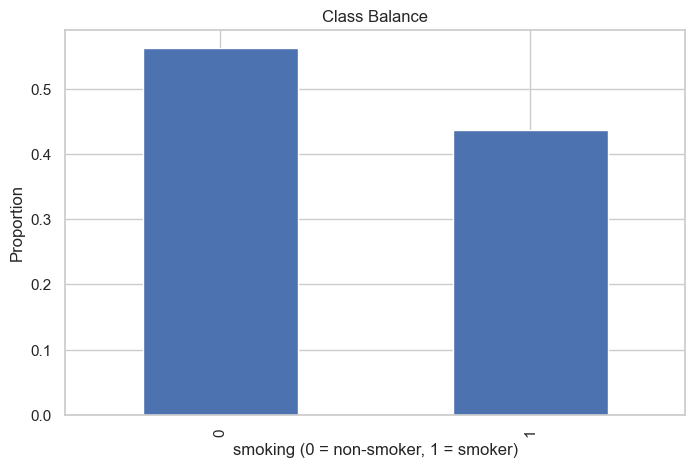

In [ ]:
# -----------------------------
# 1) Quick schema & target
# -----------------------------
TARGET = "smoking"
ID_COL = "id" if "id" in train.columns else None

print("\nDtypes:")
print(train.dtypes)

num_cols = [c for c in train.columns if c not in [TARGET, ID_COL] and np.issubdtype(train[c].dtype, np.number)]
cat_cols = [c for c in train.columns if c not in [TARGET, ID_COL] and not np.issubdtype(train[c].dtype, np.number)]

print(f"\nNumeric features: {len(num_cols)}  |  Categorical features: {len(cat_cols)}")

# Target check
print("\nTarget distribution:")
print(train[TARGET].value_counts(dropna=False))
print("\nTarget ratio (positive rate):", train[TARGET].mean().round(4))

# Class balance plot
ax = train[TARGET].value_counts(normalize=True).sort_index().plot(kind="bar")
ax.set_title("Class Balance")
ax.set_xlabel("smoking (0 = non-smoker, 1 = smoker)")
ax.set_ylabel("Proportion")
plt.show()


In [ ]:
# -----------------------------
# 2) Missingness & duplicates
# -----------------------------
def missing_table(df):
    mis = df.isna().sum().sort_values(ascending=False)
    pct = (mis / len(df) * 100).round(2)
    out = pd.DataFrame({"missing": mis, "missing_%": pct})
    return out[out["missing"] > 0]

print("\nMissingness in train:")
display(missing_table(train))
print("\nMissingness in test:")
display(missing_table(test))

# Duplicates (exact row dupes excluding id/target)
dedup_cols = [c for c in train.columns if c not in [ID_COL, TARGET]]
dupe_count = train.duplicated(subset=dedup_cols).sum()
print(f"\nExact duplicate rows in train (excluding id/target): {dupe_count}")



Missingness in train:


,missing,missing_%



Missingness in test:


,missing,missing_%



Exact duplicate rows in train (excluding id/target): 0


,count,mean,std,min,1%,5%,50%,95%,99%,max
age,159256.0,44.306626,11.842286,20.0,20.0,25.0,40.0,65.0,75.0,85.0
height(cm),159256.0,165.266929,8.818970,135.0,145.0,150.0,165.0,180.0,185.0,190.0
weight(kg),159256.0,67.143662,12.586198,30.0,45.0,50.0,65.0,90.0,100.0,130.0
waist(cm),159256.0,83.001990,8.957937,51.0,63.0,68.0,83.0,98.0,104.0,127.0
eyesight(left),159256.0,1.005798,0.402113,0.1,0.2,0.5,1.0,1.5,1.5,9.9
eyesight(right),159256.0,1.000989,0.392299,0.1,0.2,0.5,1.0,1.5,1.5,9.9
hearing(left),159256.0,1.023974,0.152969,1.0,1.0,1.0,1.0,1.0,2.0,2.0
hearing(right),159256.0,1.023421,0.151238,1.0,1.0,1.0,1.0,1.0,2.0,2.0
systolic,159256.0,122.503648,12.729315,77.0,95.0,101.0,121.0,144.0,154.0,213.0
relaxation,159256.0,76.874071,8.994642,44.0,59.0,61.0,78.0,91.0,100.0,133.0


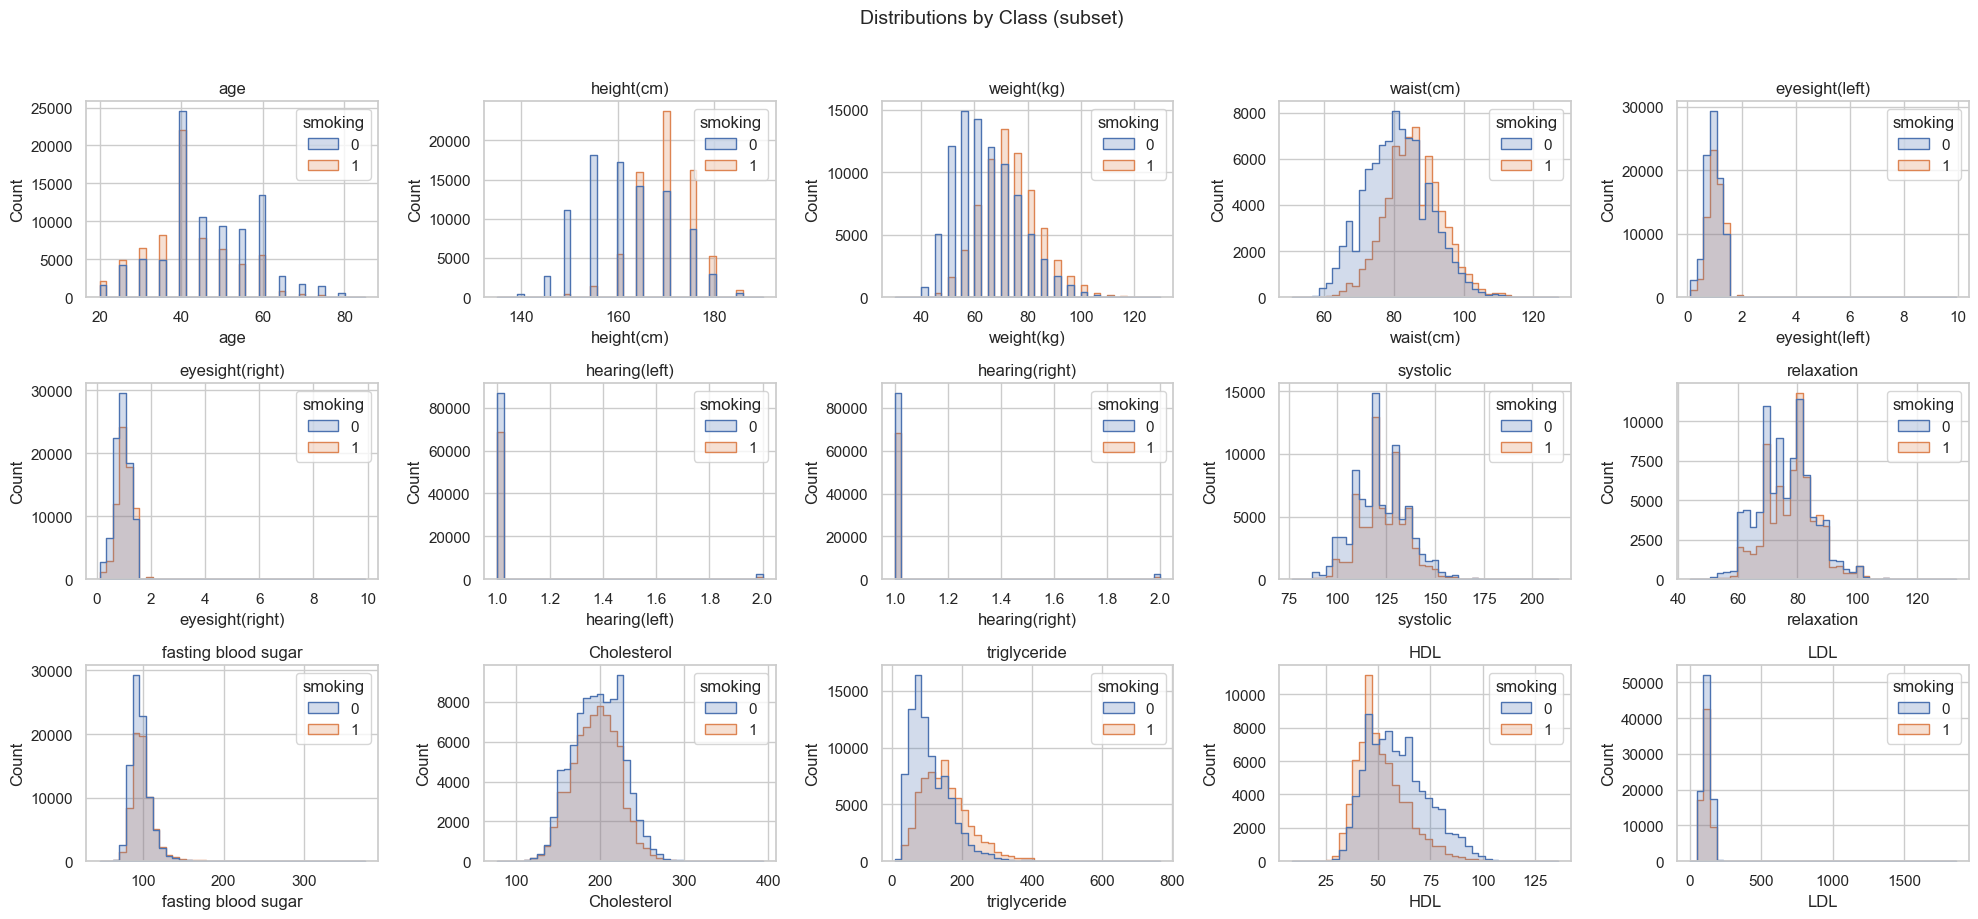

In [ ]:
# -----------------------------
# 3) Summary stats & sanity ranges
# -----------------------------
display(train[num_cols].describe(percentiles=[.01, .05, .5, .95, .99]).T)

# Quick histograms for a few key numeric features
grid_cols = min(5, len(num_cols))
grid_rows = math.ceil(min(15, len(num_cols)) / grid_cols)

fig, axes = plt.subplots(grid_rows, grid_cols, figsize=(grid_cols*4, grid_rows*3))
axes = axes.ravel()
for i, c in enumerate(num_cols[:grid_rows*grid_cols]):
    sns.histplot(data=train, x=c, hue=TARGET, bins=40, ax=axes[i], stat="count", element="step")
    axes[i].set_title(c)
for j in range(i+1, grid_rows*grid_cols):
    axes[j].axis("off")
fig.suptitle("Distributions by Class (subset)", y=1.02, fontsize=14)
plt.tight_layout()
plt.show()


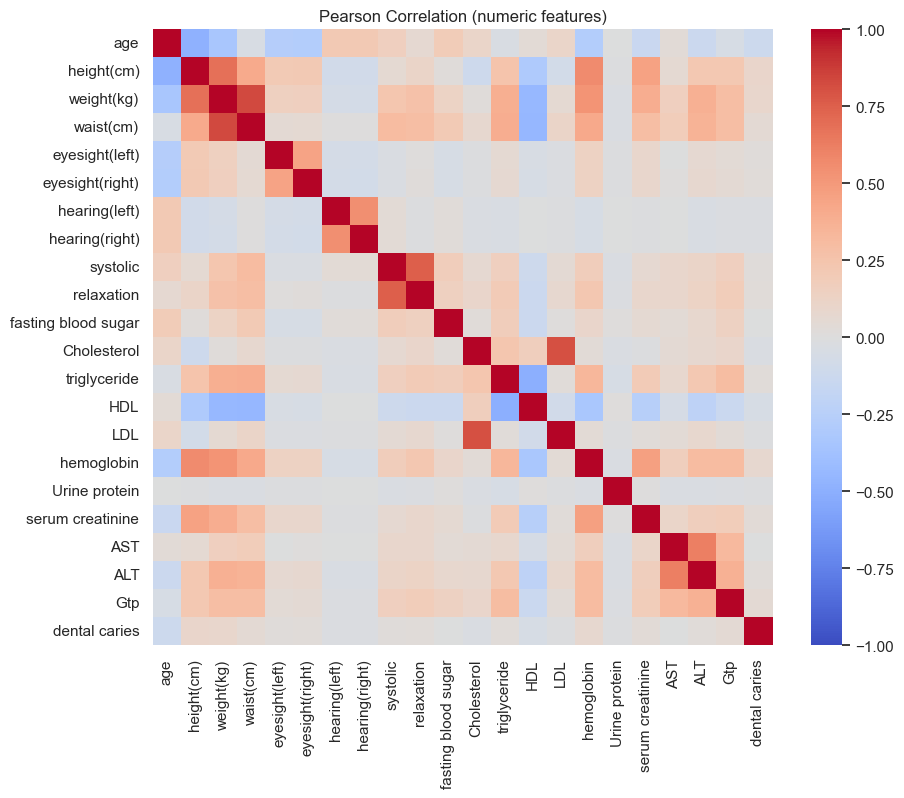

,feat_1,feat_2,corr


In [ ]:
# -----------------------------
# 4) Correlation & multicollinearity
# -----------------------------
corr = train[num_cols].corr(method="pearson")
plt.figure(figsize=(10,8))
sns.heatmap(corr, cmap="coolwarm", center=0, vmin=-1, vmax=1)
plt.title("Pearson Correlation (numeric features)")
plt.show()

# Highly correlated pairs
thr = 0.9
pairs = []
for i, c1 in enumerate(num_cols):
    for c2 in num_cols[i+1:]:
        r = corr.loc[c1, c2]
        if abs(r) >= thr:
            pairs.append((c1, c2, r))
pairs_sorted = sorted(pairs, key=lambda x: -abs(x[2]))
pd.DataFrame(pairs_sorted, columns=["feat_1","feat_2","corr"]).head(10)


In [ ]:
# -----------------------------
# 5) Outliers (IQR rule) and near-constant features
# -----------------------------
def iqr_outlier_fraction(s: pd.Series, k=1.5):
    q1, q3 = s.quantile(0.25), s.quantile(0.75)
    iqr_ = q3 - q1
    lo, hi = q1 - k*iqr_, q3 + k*iqr_
    return ((s < lo) | (s > hi)).mean()

outlier_fracs = {c: iqr_outlier_fraction(train[c].dropna()) for c in num_cols}
pd.Series(outlier_fracs).sort_values(ascending=False).head(10)

# Near-constant (low variance) features
variances = train[num_cols].var()
near_const = variances[variances < 1e-6].index.tolist()
print("Near-constant numeric features:", near_const)


Near-constant numeric features: []


In [ ]:
# -----------------------------
# 6) Train vs Test shift (KS for numeric, chi2 for categorical)
# -----------------------------
def ks_table(numeric_cols, df_train, df_test):
    rows = []
    for c in numeric_cols:
        a = df_train[c].dropna()
        b = df_test[c].dropna()
        if len(a) > 0 and len(b) > 0:
            stat, p = ks_2samp(a, b)
            rows.append((c, stat, p, a.mean(), b.mean()))
    return pd.DataFrame(rows, columns=["feature","ks_stat","p_value","train_mean","test_mean"]).sort_values("ks_stat", ascending=False)

ks_num = ks_table(num_cols, train, test)
display(ks_num.head(12))

def chi2_table(cat_cols, df_train, df_test):
    rows = []
    for c in cat_cols:
        if c is None: 
            continue
        ct = pd.crosstab(df_train[c], columns="train")
        ct2 = pd.crosstab(df_test[c], columns="test")
        merged = ct.join(ct2, how="outer").fillna(0)
        stat, p, *_ = chi2_contingency(merged.values)
        rows.append((c, stat, p))
    return pd.DataFrame(rows, columns=["feature","chi2","p_value"]).sort_values("chi2", ascending=False)

if cat_cols:
    display(chi2_table(cat_cols, train, test).head(12))


,feature,ks_stat,p_value,train_mean,test_mean
9,relaxation,0.006077,0.018038,76.874071,76.820676
0,age,0.004639,0.128499,44.306626,44.426538
10,fasting blood sugar,0.004206,0.209200,98.352552,98.397943
3,waist(cm),0.003565,0.392241,83.001990,82.999892
8,systolic,0.003550,0.397509,122.503648,122.475403
18,AST,0.003280,0.498608,25.516853,25.559616
12,triglyceride,0.003226,0.520121,127.616046,127.406203
1,height(cm),0.003177,0.540063,165.266929,165.221322
11,Cholesterol,0.003067,0.585904,195.796165,195.874391
13,HDL,0.003025,0.603198,55.852684,55.922286


height(cm)          0.138521
hemoglobin          0.132210
Gtp                 0.099486
weight(kg)          0.081660
triglyceride        0.074750
serum creatinine    0.063791
waist(cm)           0.042790
HDL                 0.040077
ALT                 0.030065
age                 0.028401
relaxation          0.015531
Urine protein       0.014331
hearing(left)       0.013813
eyesight(right)     0.013502
hearing(right)      0.013498
dtype: float64

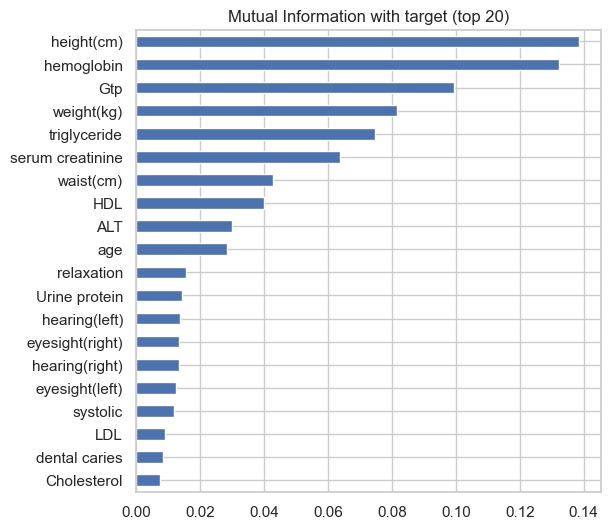

In [ ]:
# -----------------------------
# 7) Leakage probe (mutual information)
#    Very high MI may suggest leakage or target-like behavior.
# -----------------------------
X = train[num_cols + cat_cols].copy()
y = train[TARGET].values

# Rough handling: treat all non-numeric as category codes
for c in cat_cols:
    X[c] = X[c].astype("category").cat.codes

X = X.fillna(X.median(numeric_only=True))

mi = mutual_info_classif(X, y, discrete_features=[c in cat_cols for c in X.columns], random_state=42)
mi_series = pd.Series(mi, index=X.columns).sort_values(ascending=False)
display(mi_series.head(15))

ax = mi_series.head(20)[::-1].plot(kind="barh", figsize=(6,6))
ax.set_title("Mutual Information with target (top 20)")
plt.show()


In-sample ROC-AUC (sanity-only): 0.8343


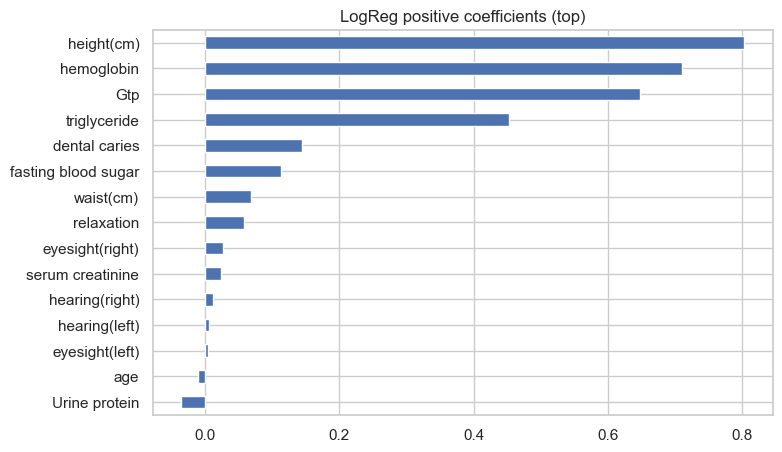

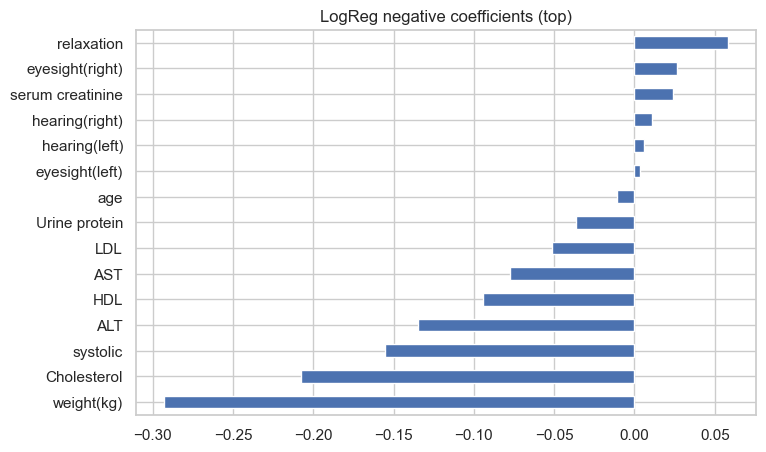

In [ ]:
# -----------------------------
# 8) Lightweight baseline & feature importance (optional)
#    Standardized logistic regression for interpretability.
# -----------------------------
scaler = StandardScaler(with_mean=True, with_std=True)
X_num = train[num_cols].fillna(train[num_cols].median())
X_std = pd.DataFrame(scaler.fit_transform(X_num), columns=num_cols)

clf = LogisticRegression(max_iter=200, class_weight="balanced", n_jobs=None)
clf.fit(X_std, y)
pred = clf.predict_proba(X_std)[:, 1]
print("In-sample ROC-AUC (sanity-only):", roc_auc_score(y, pred).round(4))

coefs = pd.Series(clf.coef_.ravel(), index=num_cols).sort_values()
coefs.tail(15).plot(kind="barh"); plt.title("LogReg positive coefficients (top)"); plt.show()
coefs.head(15).plot(kind="barh"); plt.title("LogReg negative coefficients (top)"); plt.show()


,fold,size,pos_rate
0,1,31852,0.437367
1,2,31851,0.437380
2,3,31851,0.437380
3,4,31851,0.437349
4,5,31851,0.437349


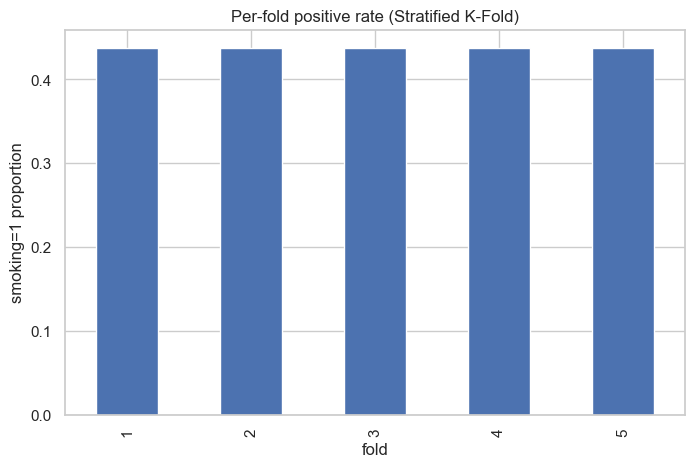

In [ ]:
# -----------------------------
# 9) Stratified K-Fold stability check (class ratio per fold)
# -----------------------------
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
ratios = []
for k, (_, val_idx) in enumerate(skf.split(train, train[TARGET]), start=1):
    ratios.append({"fold": k, "size": len(val_idx), "pos_rate": train.iloc[val_idx][TARGET].mean()})
fold_stats = pd.DataFrame(ratios)
display(fold_stats)

ax = fold_stats.set_index("fold")["pos_rate"].plot(kind="bar")
ax.set_title("Per-fold positive rate (Stratified K-Fold)")
ax.set_ylabel("smoking=1 proportion")
plt.show()


In [ ]:
# -----------------------------
# 10) Nice-to-haves (toggle on if you want more visuals)
# -----------------------------
DO_PAIRPLOT = False
if DO_PAIRPLOT and len(num_cols) >= 5:
    sns.pairplot(train[[TARGET] + num_cols[:4]], hue=TARGET, corner=True, diag_kind="hist")
    plt.show()


[LR] Fold 1: ROC-AUC=0.8344  PR-AUC(AP)=0.7478
[LR] Fold 2: ROC-AUC=0.8348  PR-AUC(AP)=0.7489
[LR] Fold 3: ROC-AUC=0.8368  PR-AUC(AP)=0.7533
[LR] Fold 4: ROC-AUC=0.8305  PR-AUC(AP)=0.7471
[LR] Fold 5: ROC-AUC=0.8346  PR-AUC(AP)=0.7482

[LR] OOF summary
Mean ROC-AUC: 0.8342 ± 0.0021
Mean PR-AUC : 0.7491 ± 0.0022


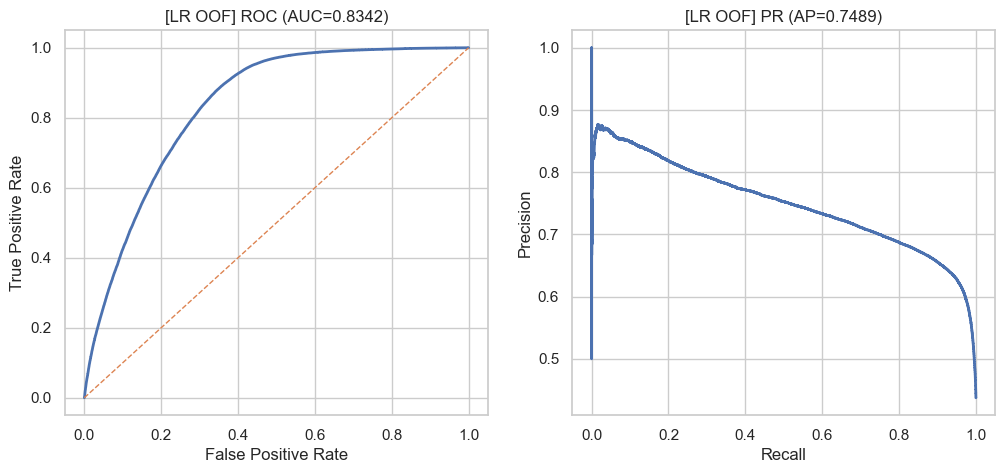

,y_rate,p_mean,n
bin,,,
"(-0.00099999999244, 0.0656]",0.012433,0.042154,15926
"(0.0656, 0.12]",0.029825,0.090658,15926
"(0.12, 0.231]",0.093124,0.167655,15925
"(0.231, 0.396]",0.303654,0.315326,15926
"(0.396, 0.519]",0.484270,0.460772,15925
"(0.519, 0.616]",0.564800,0.569216,15926
"(0.616, 0.7]",0.636044,0.658558,15925
"(0.7, 0.779]",0.688936,0.739057,15926
"(0.779, 0.861]",0.738336,0.818833,15925


[100]	train's auc: 0.861019	valid's auc: 0.85625
[200]	train's auc: 0.870023	valid's auc: 0.86229
[300]	train's auc: 0.875394	valid's auc: 0.864518
[400]	train's auc: 0.879395	valid's auc: 0.865566
[500]	train's auc: 0.882917	valid's auc: 0.866154
[600]	train's auc: 0.886113	valid's auc: 0.866629
[700]	train's auc: 0.888962	valid's auc: 0.866973
[800]	train's auc: 0.891758	valid's auc: 0.867153
[900]	train's auc: 0.894522	valid's auc: 0.867346
[1000]	train's auc: 0.897136	valid's auc: 0.867481
[1100]	train's auc: 0.899629	valid's auc: 0.867611
[1200]	train's auc: 0.901961	valid's auc: 0.867735
[1300]	train's auc: 0.904271	valid's auc: 0.867804
[1400]	train's auc: 0.906661	valid's auc: 0.867847
[1500]	train's auc: 0.908993	valid's auc: 0.867922
[1600]	train's auc: 0.911139	valid's auc: 0.867971
[1700]	train's auc: 0.913186	valid's auc: 0.868034
[1800]	train's auc: 0.915187	valid's auc: 0.867991
[1900]	train's auc: 0.917289	valid's auc: 0.868055
[2000]	train's auc: 0.919192	valid's auc: 

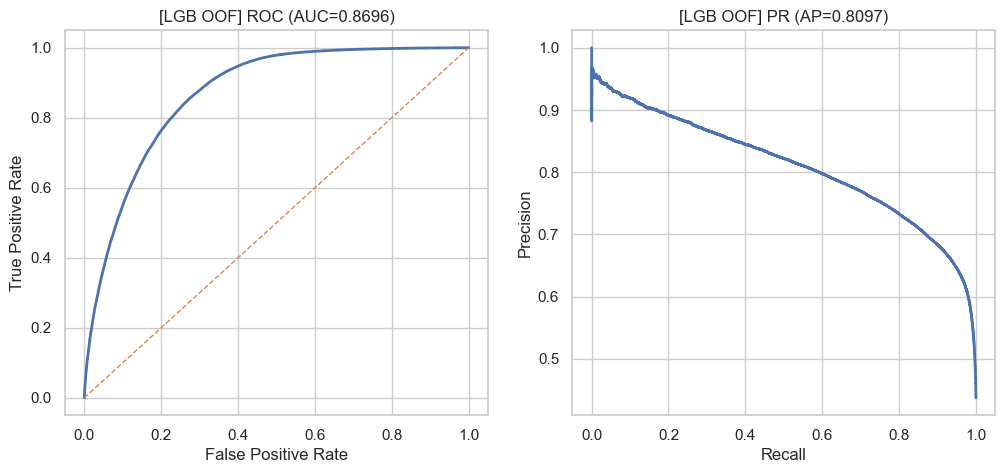

,y_rate,p_mean,n
bin,,,
"(-0.0009007, 0.0143]",0.007284,0.007512,15926
"(0.0143, 0.0433]",0.023923,0.026297,15926
"(0.0433, 0.163]",0.073407,0.088330,15925
"(0.163, 0.382]",0.244506,0.276429,15926
"(0.382, 0.539]",0.415322,0.464983,15925
"(0.539, 0.653]",0.534346,0.598425,15926
"(0.653, 0.739]",0.647096,0.697300,15925
"(0.739, 0.809]",0.732136,0.774866,15926
"(0.809, 0.874]",0.805086,0.841438,15925


height(cm)             548636.200347
hemoglobin             304943.258732
Gtp                    182224.558644
triglyceride           119220.032457
LDL                     57403.574587
age                     53822.269769
ALT                     41537.247113
Cholesterol             40484.807546
serum creatinine        39875.891113
waist(cm)               32668.297969
fasting blood sugar     32006.383247
HDL                     31066.397745
AST                     30839.378308
systolic                30479.868135
relaxation              25363.610546
weight(kg)              16079.378458
eyesight(left)          12947.627697
eyesight(right)         10858.815238
dental caries           10783.203627
hearing(right)           1103.226682
dtype: float64

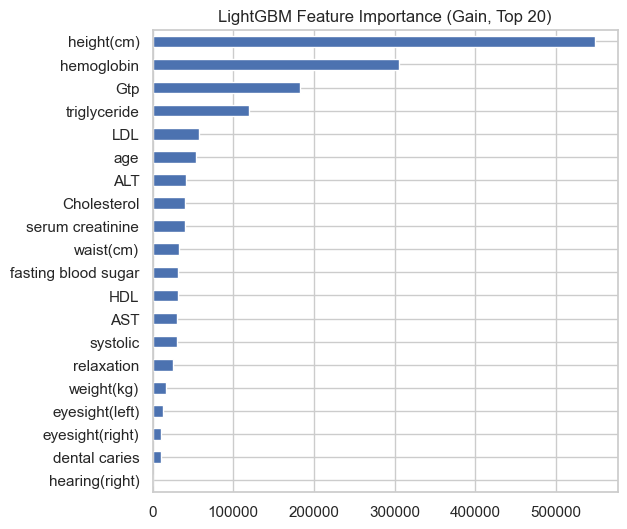

Saved: submission.csv
{
  "LR_OOF_ROC_mean": 0.8342230157978378,
  "LR_OOF_ROC_std": 0.002057102024001517,
  "LR_OOF_PR_mean": 0.7490504062264123,
  "LR_OOF_PR_std": 0.0022054342595106487,
  "LGB_OOF_ROC_mean": 0.8695790870467619,
  "LGB_OOF_ROC_std": 0.0010812960269964216,
  "LGB_OOF_PR_mean": 0.8098362375620389,
  "LGB_OOF_PR_std": 0.0019363681697309907,
  "Avg_best_iter": 2317,
  "Final_num_iter": 0
}


In [ ]:
# =========================================================
# Binary Prediction of Smoker Status (Kaggle PS S3E24)
# Final training script: LR baseline + LightGBM (v4+ callbacks),
# Stratified K-Fold with OOF, isotonic calibration, diagnostics,
# feature importance, and final submission.
# =========================================================

import os, warnings, json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import (
    roc_auc_score, average_precision_score,
    precision_recall_curve, roc_curve
)
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.isotonic import IsotonicRegression

import lightgbm as lgb
warnings.filterwarnings("ignore")

# ---------- Paths ----------
KAGGLE_DIR = "/kaggle/input/playground-series-s3e24"
DATA_DIR = KAGGLE_DIR if os.path.exists(KAGGLE_DIR) else "./data"
train = pd.read_csv(os.path.join(DATA_DIR, "train.csv"))
test  = pd.read_csv(os.path.join(DATA_DIR, "test.csv"))

TARGET = "smoking"
ID_COL = "id" if "id" in train.columns else None
feature_cols = [c for c in train.columns if c not in [TARGET, ID_COL]]

X = train[feature_cols].copy()
y = train[TARGET].astype(int).copy()
X_test = test[feature_cols].copy()

# ---------- Safety impute ----------
X = X.replace([np.inf, -np.inf], np.nan)
X_test = X_test.replace([np.inf, -np.inf], np.nan)
num_imputer = SimpleImputer(strategy="median")
X[feature_cols] = num_imputer.fit_transform(X)
X_test[feature_cols] = num_imputer.transform(X_test)

# ---------- Helpers ----------
def pr_auc_score(y_true, y_prob):
    return average_precision_score(y_true, y_prob)

def plot_roc_pr(y_true, y_prob, title_prefix=""):
    fpr, tpr, _ = roc_curve(y_true, y_prob)
    prec, rec, _ = precision_recall_curve(y_true, y_prob)
    fig, axes = plt.subplots(1,2, figsize=(12,5))
    # ROC
    axes[0].plot(fpr, tpr, lw=2)
    axes[0].plot([0,1], [0,1], "--", lw=1)
    axes[0].set_title(f"{title_prefix} ROC (AUC={roc_auc_score(y_true, y_prob):.4f})")
    axes[0].set_xlabel("False Positive Rate"); axes[0].set_ylabel("True Positive Rate")
    # PR
    axes[1].plot(rec, prec, lw=2)
    axes[1].set_title(f"{title_prefix} PR (AP={average_precision_score(y_true, y_prob):.4f})")
    axes[1].set_xlabel("Recall"); axes[1].set_ylabel("Precision")
    plt.show()

def reliability_curve(y_true, y_prob, bins=10):
    df = pd.DataFrame({"y": y_true, "p": y_prob})
    df["bin"] = pd.qcut(df["p"], q=bins, duplicates="drop")
    cal = df.groupby("bin", observed=False).agg(y_rate=("y","mean"), p_mean=("p","mean"), n=("y","size"))
    return cal

# =========================================================
# 1) Baseline: Logistic Regression (scaled) with 5-fold OOF
# =========================================================
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
oof_lr = np.zeros(len(X))
fold_metrics_lr = []

for k, (tr_idx, va_idx) in enumerate(skf.split(X, y), 1):
    X_tr, X_va = X.iloc[tr_idx], X.iloc[va_idx]
    y_tr, y_va = y.iloc[tr_idx], y.iloc[va_idx]

    pipe_lr = Pipeline([
        ("scaler", StandardScaler(with_mean=True, with_std=True)),
        ("clf", LogisticRegression(max_iter=200, class_weight="balanced", n_jobs=None))
    ])
    pipe_lr.fit(X_tr, y_tr)
    p_va = pipe_lr.predict_proba(X_va)[:, 1]
    oof_lr[va_idx] = p_va

    roc = roc_auc_score(y_va, p_va)
    ap  = pr_auc_score(y_va, p_va)
    fold_metrics_lr.append((roc, ap))
    print(f"[LR] Fold {k}: ROC-AUC={roc:.4f}  PR-AUC(AP)={ap:.4f}")

print("\n[LR] OOF summary")
lr_mean_roc = float(np.mean([m[0] for m in fold_metrics_lr]))
lr_std_roc  = float(np.std ([m[0] for m in fold_metrics_lr]))
lr_mean_pr  = float(np.mean([m[1] for m in fold_metrics_lr]))
lr_std_pr   = float(np.std ([m[1] for m in fold_metrics_lr]))
print(f"Mean ROC-AUC: {lr_mean_roc:.4f} ± {lr_std_roc:.4f}")
print(f"Mean PR-AUC : {lr_mean_pr:.4f} ± {lr_std_pr:.4f}")
plot_roc_pr(y, oof_lr, title_prefix="[LR OOF]")

cal_lr = reliability_curve(y, oof_lr, bins=10)
display(cal_lr)
iso_lr = IsotonicRegression(out_of_bounds="clip").fit(oof_lr, y)
oof_lr_cal = iso_lr.transform(oof_lr)

# =========================================================
# 2) LightGBM (v4+) with callbacks, 5-fold OOF + early stopping
# =========================================================
params_lgb = {
    "objective": "binary",
    "learning_rate": 0.03,
    "num_leaves": 31,
    "min_child_samples": 60,
    "subsample": 0.8,
    "colsample_bytree": 0.8,
    "reg_lambda": 1.0,
    "metric": "auc",
    "verbose": -1,
    "random_state": 42,
    "is_unbalance": True,     # handle class imbalance
}

oof_lgb = np.zeros(len(X))
fold_metrics_lgb = []
models_lgb = []
best_iterations = []

for k, (tr_idx, va_idx) in enumerate(skf.split(X, y), 1):
    X_tr, X_va = X.iloc[tr_idx], X.iloc[va_idx]
    y_tr, y_va = y.iloc[tr_idx], y.iloc[va_idx]

    dtr = lgb.Dataset(X_tr, label=y_tr)
    dva = lgb.Dataset(X_va, label=y_va, reference=dtr)

    model = lgb.train(
        params=params_lgb,
        train_set=dtr,
        valid_sets=[dtr, dva],
        valid_names=["train", "valid"],
        num_boost_round=5000,
        callbacks=[
            lgb.early_stopping(stopping_rounds=300, verbose=False),  # v4+ way
            lgb.log_evaluation(period=100),
        ],
    )

    pv = model.predict(X_va, num_iteration=model.best_iteration)
    oof_lgb[va_idx] = pv
    models_lgb.append(model)
    best_iterations.append(model.best_iteration)

    roc = roc_auc_score(y_va, pv)
    ap  = pr_auc_score(y_va, pv)
    fold_metrics_lgb.append((roc, ap))
    print(f"[LGB] Fold {k}: ROC-AUC={roc:.4f}  PR-AUC(AP)={ap:.4f}  | best_iter={model.best_iteration}")

print("\n[LGB] OOF summary")
lgb_mean_roc = float(np.mean([m[0] for m in fold_metrics_lgb]))
lgb_std_roc  = float(np.std ([m[0] for m in fold_metrics_lgb]))
lgb_mean_pr  = float(np.mean([m[1] for m in fold_metrics_lgb]))
lgb_std_pr   = float(np.std ([m[1] for m in fold_metrics_lgb]))
avg_best_iter = int(np.mean(best_iterations))

print(f"Mean ROC-AUC: {lgb_mean_roc:.4f} ± {lgb_std_roc:.4f}")
print(f"Mean PR-AUC : {lgb_mean_pr:.4f} ± {lgb_std_pr:.4f}")
print(f"Avg best_iter: {avg_best_iter}")
plot_roc_pr(y, oof_lgb, title_prefix="[LGB OOF]")

cal_lgb = reliability_curve(y, oof_lgb, bins=10)
display(cal_lgb)
iso_lgb = IsotonicRegression(out_of_bounds="clip").fit(oof_lgb, y)
oof_lgb_cal = iso_lgb.transform(oof_lgb)

# =========================================================
# 3) LightGBM Feature Importance (Gain)
# =========================================================
gain = pd.Series(0.0, index=feature_cols)
for m in models_lgb:
    g = pd.Series(m.feature_importance(importance_type="gain"), index=feature_cols)
    gain += g
gain = (gain / len(models_lgb)).sort_values(ascending=False)

display(gain.head(20))
ax = gain.head(20)[::-1].plot(kind="barh", figsize=(6,6))
ax.set_title("LightGBM Feature Importance (Gain, Top 20)")
plt.show()

# =========================================================
# 4) Final model on full data & calibrated submission
# =========================================================
final_iter = max(int(avg_best_iter * 1.1), 200)
final_model = lgb.train(
    params=params_lgb,
    train_set=lgb.Dataset(X, label=y),
    num_boost_round=final_iter
)

test_pred = final_model.predict(X_test, num_iteration=final_model.best_iteration)
test_pred_cal = iso_lgb.transform(test_pred)  # calibrated with OOF-based isotonic

sub = pd.DataFrame({
    (ID_COL if ID_COL else "id"): (test[ID_COL] if ID_COL else np.arange(len(test))),
    "smoking": test_pred_cal
})
sub_path = "submission.csv"
sub.to_csv(sub_path, index=False)
print("Saved:", sub_path)

# =========================================================
# 5) Compact results summary to paste into slides
# =========================================================
results = {
    "LR_OOF_ROC_mean": lr_mean_roc,
    "LR_OOF_ROC_std" : lr_std_roc,
    "LR_OOF_PR_mean" : lr_mean_pr,
    "LR_OOF_PR_std"  : lr_std_pr,

    "LGB_OOF_ROC_mean": lgb_mean_roc,
    "LGB_OOF_ROC_std" : lgb_std_roc,
    "LGB_OOF_PR_mean" : lgb_mean_pr,
    "LGB_OOF_PR_std"  : lgb_std_pr,

    "Avg_best_iter": avg_best_iter,
    "Final_num_iter": int(final_model.best_iteration),
}
print(json.dumps(results, indent=2))


[INFO] hdbscan not available. To enable: !pip install hdbscan (Kaggle usually allows).


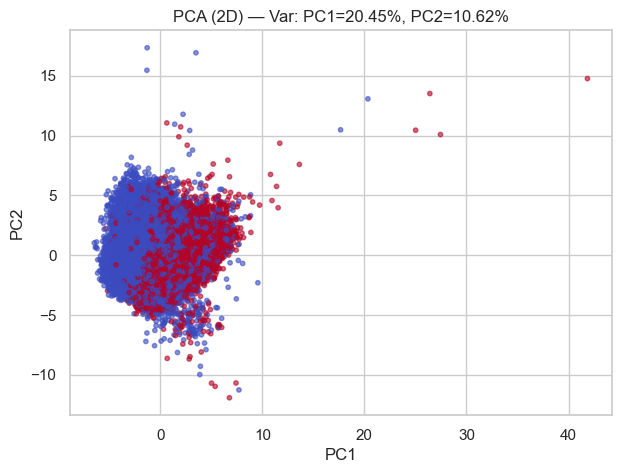

{'PCA_PC1_var%': 20.44506546455595, 'PCA_PC2_var%': 10.61970279419992}

[KMeans] model selection summary (sorted by silhouette):


,k,silhouette,NMI,ARI,mapped_acc
1,3,0.158221,0.146104,0.164243,0.709876
0,2,0.155057,0.163227,0.179456,0.712049
4,6,0.099532,0.108741,0.089252,0.713336
3,5,0.098191,0.117742,0.097300,0.714152
5,7,0.093363,0.106342,0.085117,0.713248
6,8,0.087979,0.099808,0.064404,0.703396
2,4,0.087815,0.131221,0.110475,0.718717


[KMeans] Best k=3 | mapping {0: 0, 1: 1, 2: 0} | mapped accuracy=0.7099
[KMeans] Confusion (mapped):
 [[55439 34164]
 [12040 57613]]
              precision    recall  f1-score   support

           0     0.8216    0.6187    0.7059     89603
           1     0.6277    0.8271    0.7138     69653

    accuracy                         0.7099    159256
   macro avg     0.7247    0.7229    0.7098    159256
weighted avg     0.7368    0.7099    0.7093    159256


[HDBSCAN] Skipped (module not available).

[IsolationForest] anomalies flagged: 6412 / 159256 (4.03%)
[LR 5-fold OOF] AUC full=0.8342, PR-AUC full=0.7489
[LR 5-fold OOF] AUC no-anomalies=0.8350, PR-AUC no-anomalies=0.7510  (ΔAUC=+0.0008)

=== Slide Summary (copy these numbers) ===
{
  "PCA": {
    "PC1_var%": 20.44506546455595,
    "PC2_var%": 10.61970279419992,
    "note": "Use scatter to show separation or overlap by label."
  },
  "KMeans": {
    "best_k": 3,
    "silhouette_best": 0.1582205051594786,
    "NMI_best": 0.14610366126

In [ ]:
# =========================================================
# Unsupervised / Exploratory Add-ons for S3E24
# PCA • KMeans • HDBSCAN • IsolationForest
# =========================================================

import os, warnings, json, math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, normalized_mutual_info_score, adjusted_rand_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.ensemble import IsolationForest
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_auc_score, average_precision_score

warnings.filterwarnings("ignore")
plt.rcParams["figure.figsize"] = (7,5)

# Optional: HDBSCAN (install if missing)
try:
    import hdbscan
    HDBSCAN_AVAILABLE = True
except Exception as e:
    HDBSCAN_AVAILABLE = False
    print("[INFO] hdbscan not available. To enable: !pip install hdbscan (Kaggle usually allows).")

# -----------------------------
# Load data
# -----------------------------
KAGGLE_DIR = "/kaggle/input/playground-series-s3e24"
DATA_DIR = KAGGLE_DIR if os.path.exists(KAGGLE_DIR) else "./data"
train = pd.read_csv(os.path.join(DATA_DIR, "train.csv"))
test  = pd.read_csv(os.path.join(DATA_DIR, "test.csv"))

TARGET = "smoking"
ID_COL = "id" if "id" in train.columns else None
features = [c for c in train.columns if c not in [TARGET, ID_COL]]

X = train[features].copy()
y = train[TARGET].astype(int).values

# Impute + scale (for PCA/KMeans/IF/HDBSCAN stability)
imputer = SimpleImputer(strategy="median")
scaler  = StandardScaler()
X_imp   = imputer.fit_transform(X)
X_std   = scaler.fit_transform(X_imp)

# =========================================================
# 1) PCA (2D visualization + explained variance)
# =========================================================
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_std)
expl_var = pca.explained_variance_ratio_

fig, ax = plt.subplots()
scatter = ax.scatter(X_pca[:,0], X_pca[:,1], c=y, s=10, alpha=0.6, cmap="coolwarm")
ax.set_title(f"PCA (2D) — Var: PC1={expl_var[0]:.2%}, PC2={expl_var[1]:.2%}")
ax.set_xlabel("PC1"); ax.set_ylabel("PC2")
plt.show()

print({"PCA_PC1_var%": float(expl_var[0]*100), "PCA_PC2_var%": float(expl_var[1]*100)})

# =========================================================
# 2) KMeans (model selection via silhouette; label mapping)
# =========================================================
def majority_vote_map(labels_pred, y_true):
    """Map cluster id -> majority class; returns predictions in {0,1}."""
    clusters = np.unique(labels_pred)
    mapping = {}
    for c in clusters:
        mask = labels_pred == c
        if mask.sum() == 0:
            mapping[c] = 0
        else:
            maj = int(np.round(y_true[mask].mean()))  # majority by 0/1 mean
            mapping[c] = maj
    return np.vectorize(mapping.get)(labels_pred), mapping

# Try k from 2..8 (binary classes; small range is enough)
k_grid = range(2, 9)
k_results = []
for k in k_grid:
    km = KMeans(n_clusters=k, n_init=20, random_state=42)
    labels = km.fit_predict(X_std)
    sil = silhouette_score(X_std, labels)
    nmi = normalized_mutual_info_score(y, labels)
    ari = adjusted_rand_score(y, labels)
    # Map clusters -> labels for an approximate supervised score
    y_hat, mapping = majority_vote_map(labels, y)
    acc = (y_hat == y).mean()
    k_results.append((k, sil, nmi, ari, acc))

kdf = pd.DataFrame(k_results, columns=["k","silhouette","NMI","ARI","mapped_acc"]).sort_values("silhouette", ascending=False)
print("\n[KMeans] model selection summary (sorted by silhouette):")
display(kdf)

# Choose best K by silhouette, evaluate + confusion
best_k = int(kdf.iloc[0]["k"])
km = KMeans(n_clusters=best_k, n_init=20, random_state=42).fit(X_std)
labels = km.labels_
y_hat, mapping = majority_vote_map(labels, y)
print(f"[KMeans] Best k={best_k} | mapping {mapping} | mapped accuracy={np.mean(y_hat==y):.4f}")
print("[KMeans] Confusion (mapped):\n", confusion_matrix(y, y_hat))
print(classification_report(y, y_hat, digits=4))

# =========================================================
# 3) HDBSCAN (density clusters + noise) — optional
# =========================================================
if HDBSCAN_AVAILABLE:
    # Sensible defaults for tabular: small min_cluster_size to allow fine granularity
    hdb = hdbscan.HDBSCAN(min_cluster_size=50, min_samples=10, cluster_selection_epsilon=0.0)
    labels_hdb = hdb.fit_predict(X_std)
    n_noise = np.sum(labels_hdb == -1)
    n_clust = len(set(labels_hdb)) - (1 if -1 in labels_hdb else 0)

    print(f"\n[HDBSCAN] clusters={n_clust}, noise={n_noise} ({n_noise/len(X_std):.2%})")

    # Evaluate only on clustered points (ignore noise) for purity/NMI/ARI
    mask_c = labels_hdb != -1
    if mask_c.sum() > 0 and len(np.unique(labels_hdb[mask_c])) > 1:
        nmi_h = normalized_mutual_info_score(y[mask_c], labels_hdb[mask_c])
        ari_h = adjusted_rand_score(y[mask_c], labels_hdb[mask_c])
        y_hat_h, mapping_h = majority_vote_map(labels_hdb[mask_c], y[mask_c])
        acc_h = (y_hat_h == y[mask_c]).mean()
        print(f"[HDBSCAN] NMI={nmi_h:.4f} ARI={ari_h:.4f} mapped_acc={acc_h:.4f} on clustered points")
    else:
        print("[HDBSCAN] Not enough clustered points to compute NMI/ARI.")

    # Quick 2D viz on PCA space, color by HDBSCAN labels
    fig, ax = plt.subplots()
    lbl = labels_hdb.copy()
    # re-color noise as -1 -> a separate color
    scatter = ax.scatter(X_pca[:,0], X_pca[:,1], c=lbl, s=10, cmap="tab20", alpha=0.7)
    ax.set_title("HDBSCAN clusters on PCA(2D) (noise = -1)")
    ax.set_xlabel("PC1"); ax.set_ylabel("PC2")
    plt.show()
else:
    print("\n[HDBSCAN] Skipped (module not available).")

# =========================================================
# 4) Isolation Forest (anomaly detection) + effect on LR AUC
# =========================================================
iso = IsolationForest(
    n_estimators=300, max_samples="auto", contamination="auto",
    random_state=42, n_jobs=-1, verbose=0
)
iso.fit(X_std)
iso_score = iso.decision_function(X_std)         # higher = more normal
iso_pred  = iso.predict(X_std)                   # -1 anomaly, +1 normal
anomaly_mask = (iso_pred == -1)
anomaly_rate = anomaly_mask.mean()
print(f"\n[IsolationForest] anomalies flagged: {anomaly_mask.sum()} / {len(X_std)} ({anomaly_rate:.2%})")

# Compare a quick LR baseline AUC with/without anomalies
def quick_lr_auc(X_mat, y_vec):
    skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    oof = np.zeros(len(y_vec))
    for tr, va in skf.split(X_mat, y_vec):
        pipe = Pipeline([
            ("scaler", StandardScaler(with_mean=True, with_std=True)),
            ("lr", LogisticRegression(max_iter=200, class_weight="balanced"))
        ])
        pipe.fit(X_mat[tr], y_vec[tr])
        oof[va] = pipe.predict_proba(X_mat[va])[:,1]
    return roc_auc_score(y_vec, oof), average_precision_score(y_vec, oof)

auc_full, ap_full = quick_lr_auc(X_std, y)
auc_clean, ap_clean = quick_lr_auc(X_std[~anomaly_mask], y[~anomaly_mask])

print(f"[LR 5-fold OOF] AUC full={auc_full:.4f}, PR-AUC full={ap_full:.4f}")
print(f"[LR 5-fold OOF] AUC no-anomalies={auc_clean:.4f}, PR-AUC no-anomalies={ap_clean:.4f}  (ΔAUC={auc_clean-auc_full:+.4f})")

# =========================================================
# 5) Slide-ready summary
# =========================================================
summary = {
  "PCA": {
    "PC1_var%": float(expl_var[0]*100),
    "PC2_var%": float(expl_var[1]*100),
    "note": "Use scatter to show separation or overlap by label."
  },
  "KMeans": {
    "best_k": int(best_k),
    "silhouette_best": float(kdf.iloc[0]["silhouette"]),
    "NMI_best": float(kdf.iloc[0]["NMI"]),
    "ARI_best": float(kdf.iloc[0]["ARI"]),
    "mapped_accuracy_best": float(kdf.iloc[0]["mapped_acc"])
  },
  "HDBSCAN": ("installed" if HDBSCAN_AVAILABLE else "not_installed")
}
print("\n=== Slide Summary (copy these numbers) ===")
print(json.dumps(summary, indent=2))


In [ ]:
# ================================================
# Smoker dataset: Normal LR vs K-Fold LR (OOF)
# ================================================
import os, numpy as np, pandas as pd, warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, average_precision_score

# --- Load
DATA_DIR = "./data"
train = pd.read_csv(DATA_DIR + "/train.csv")

TARGET = "smoking"
ID_COL = "id" if "id" in train.columns else None
feat_cols = [c for c in train.columns if c not in [TARGET, ID_COL]]

X = train[feat_cols].copy()
y = train[TARGET].astype(int).values

# --- A) "Normal" LR on a single hold-out (80/20 stratified)
X_tr, X_va, y_tr, y_va = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

pipe_lr = Pipeline([
    ("imp", SimpleImputer(strategy="median")),
    ("sc", StandardScaler(with_mean=True, with_std=True)),
    ("lr", LogisticRegression(max_iter=200, class_weight="balanced"))
])
pipe_lr.fit(X_tr, y_tr)
p_hold = pipe_lr.predict_proba(X_va)[:, 1]
roc_hold = roc_auc_score(y_va, p_hold)
pr_hold  = average_precision_score(y_va, p_hold)

print(f"[Normal LR] Hold-out ROC-AUC={roc_hold:.4f}  PR-AUC={pr_hold:.4f}")

# --- B) Stratified K-Fold LR with OOF
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
oof = np.zeros(len(y))

fold_rocs, fold_prs = [], []
for k, (tr, va) in enumerate(skf.split(X, y), 1):
    pipe = Pipeline([
        ("imp", SimpleImputer(strategy="median")),
        ("sc", StandardScaler(with_mean=True, with_std=True)),
        ("lr", LogisticRegression(max_iter=200, class_weight="balanced"))
    ])
    pipe.fit(X.iloc[tr], y[tr])
    p = pipe.predict_proba(X.iloc[va])[:, 1]
    oof[va] = p
    fold_rocs.append(roc_auc_score(y[va], p))
    fold_prs.append(average_precision_score(y[va], p))
    print(f"[KFold LR] Fold {k}: ROC={fold_rocs[-1]:.4f}  PR={fold_prs[-1]:.4f}")

roc_oof = roc_auc_score(y, oof)
pr_oof  = average_precision_score(y, oof)

print("\n[KFold LR] OOF summary")
print(f"Mean ROC-AUC={np.mean(fold_rocs):.4f} ± {np.std(fold_rocs):.4f}")
print(f"Mean PR-AUC ={np.mean(fold_prs):.4f} ± {np.std(fold_prs):.4f}")
print(f"OOF ROC-AUC={roc_oof:.4f}  OOF PR-AUC={pr_oof:.4f}")

# --- Side-by-side comparison
print("\n=== Comparison (copy to slides) ===")
print({
    "Normal_LR_ROC": round(roc_hold, 4),
    "Normal_LR_PR" : round(pr_hold, 4),
    "KFold_LR_ROC_mean": round(np.mean(fold_rocs), 4),
    "KFold_LR_ROC_std" : round(np.std(fold_rocs), 4),
    "KFold_LR_PR_mean" : round(np.mean(fold_prs), 4),
    "KFold_LR_PR_std"  : round(np.std(fold_prs), 4),
    "KFold_LR_ROC_OOF" : round(roc_oof, 4),
    "KFold_LR_PR_OOF"  : round(pr_oof, 4),
})


FileNotFoundError: [Errno 2] No such file or directory: '/data/train.csv'